In [1]:
import os,sys,inspect
os.chdir('../')


from simulator import * 
import preprocessing.deconvolution as deconv
import preprocessing.autoencoders 
import detector.naive_detector
import utils

import numpy as np
import matplotlib.pyplot as plt


In [2]:
sim = simulator(100, 1)
print(sim)

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1


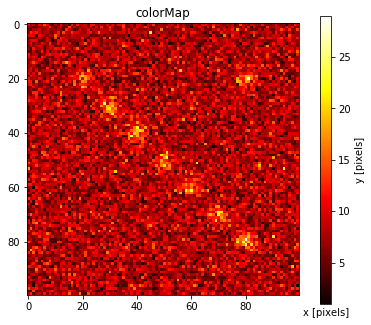

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 8
photons_in_background is set to 1 by default
SNR: 10
x0: [20. 30. 40. 50. 60. 70. 80. 80.]
y0: [20. 30. 40. 50. 60. 70. 80. 20.]


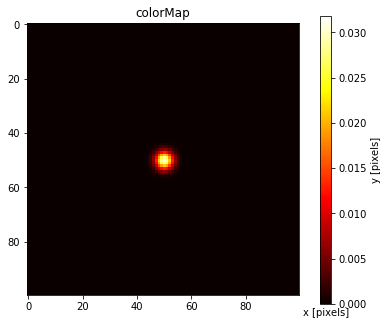

In [35]:
x0 = list(np.linspace(20, 80, 7))
y0 = list(np.linspace(20, 80, 7))

x0.append(80)
y0.append(20)
x0 = np.array(x0)
y0 = np.array(y0)

raw_image = sim.create_simulation_from_SNR(x0, y0, 10, verbose=True)
kernel = utils.gaussian_kernel(100, sim.variance, verbose=True)





Preprocessing:
------------------


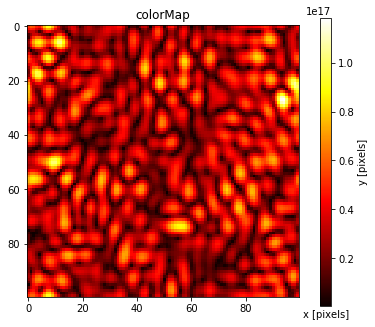

In [30]:
inv_filtered_image = deconv.inv_filter(raw_image, kernel)
visualize(inv_filtered_image)

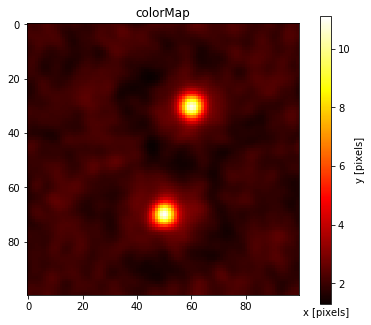

In [29]:
regularized_filtered_image = deconv.regularized_filter(raw_image, kernel, alpha=1)
visualize(regularized_filtered_image)

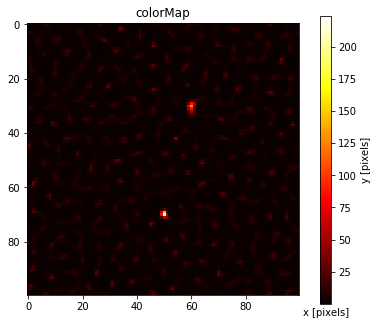

(100, 100)


In [25]:
rl_filtered_image = deconv.richardson_lucy_deconv(raw_image, kernel, 200)
visualize(rl_filtered_image)
print(rl_filtered_image.shape)

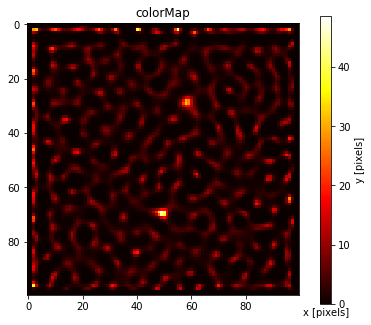

In [22]:
from skimage import restoration
deconvolved_RL = restoration.richardson_lucy(raw_image, kernel, iterations=100, clip=False)
visualize(deconvolved_RL)

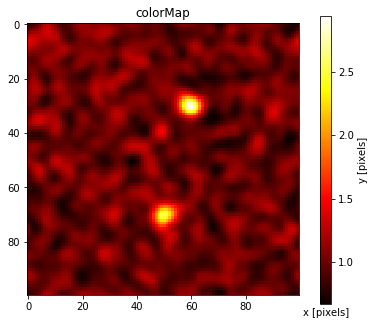

In [17]:
wiener_filtered_image = deconv.wiener_deconv(raw_image, kernel)
visualize(wiener_filtered_image)

Detecting Atoms Using the Filtered Image
-------------------------------

1. make a around the atom and then apply the naive classifier\\
2. do a binary classifier on every pixel